In [1]:
from astropy.io import fits 
from astropy import wcs
import numpy as np
from astropy.nddata import Cutout2D
import matplotlib.pyplot as plt
import astropy.units as u

In [3]:
f = fits.open("MeerKAT_radio_bubbles.fits")  #read in original FITS image with the input image path in in_file
scidata = f[0].data.squeeze()
scidata = np.where(np.isnan(scidata), 0, scidata)
scidata = scidata - np.min(scidata)
header = f[0].header
w = wcs.WCS(header, naxis = 2)

In [4]:
scidata = np.delete(scidata, np.s_[0:35], 0)
scidata = np.delete(scidata, np.s_[0:31], 1)

In [5]:
scidata.shape

(11000, 8700)

In [6]:
b = 440
a = 580

size = ((a*u.pix, b*u.pix))

In [7]:
def download_image_save_cutout(n, m, f):

    cutout = Cutout2D(scidata, position=(a/2+n*a, b/2+m*b), size=size, wcs = w, mode='partial')
 
    hdu = fits.PrimaryHDU(cutout.data, header=cutout.wcs.to_header())
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(r'C:\Users\shari\Documents\YR 4 Project\My work\Images\cut{}.fits'.format(f), overwrite=True)

In [8]:
f = 0
n = 0
while n < scidata.shape[1]/a:
    m = 0
    while m < scidata.shape[0]/b:
        download_image_save_cutout(n, m, f)
        m+=1
        f+=1
    n+=1

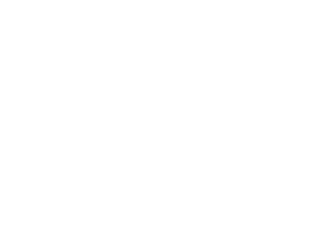

In [13]:
k = 0
for i in range(int(scidata.shape[1]/b)):
    for j in range(int(scidata.shape[1]/a)):
        dat = fits.open(r'C:\Users\shari\Documents\YR 4 Project\My work\Images\cut{}.fits'.format(k))[0]
        plt.subplot(scidata.shape[1]/b,scidata.shape[1]/a,k+1)
        plt.imshow(dat.data)
        plt.axis("off")
        k+=1
plt.subplots_adjust(wspace=0, hspace=0)